# The following is a part of the supplementary material for the paper entitled "Cost-effectiveness of Screening for Chronic Kidney Disease Using a Cumulative eGFR-based Statistic", PONE-D-23-27416R1.
## For further infromation, please contact rzafarnejad@bwh.harvard.edu

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from numba import jit
import collections
import pickle
import time
from multiprocessing import Pool

<ipython-input-4-7b81b2ec3564>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dfm_wide = dfm.pivot("WTP", "cols", "vals")


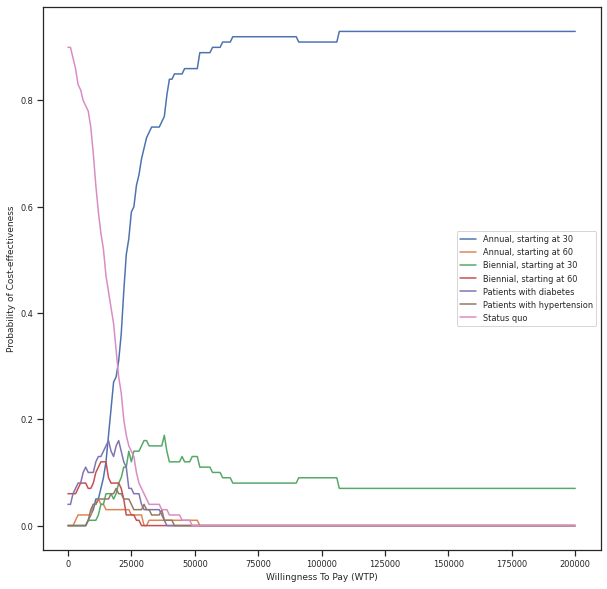

In [4]:
PSAs = pd.read_csv('results_ceas_2023.csv')
#PSAs = PSAs[PSAs['lambda'].isin(lklis_4)]
dfm = PSAs.melt('WTP', var_name='cols', value_name='vals')
dfm_wide = dfm.pivot("WTP", "cols", "vals")

sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=0.75)
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.subplots_adjust(wspace = 0.3)

sns.lineplot(data = dfm_wide, dashes=False)  
#sns.lmplot('lambda', 'vals', data=dfm, hue='cols', ci=None, order=2, truncate=True)
        
axs.set_xlabel('Willingness To Pay (WTP)')
axs.set_ylabel('Probability of Cost-effectiveness')

plt.savefig('fing_new.jpg', orientation="landscape",
           dpi=300)

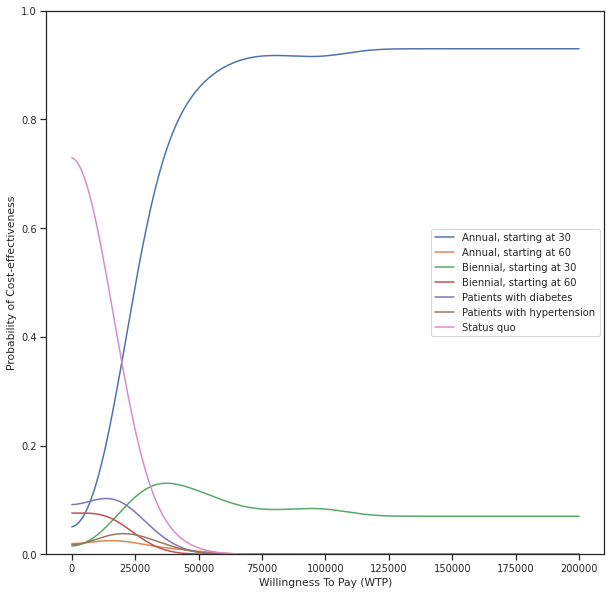

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d  # Fix the import for gaussian_filter1d

# Load CSV data
PSA_smooth = pd.read_csv('results_ceas_2023.csv')

# Create a figure and set style
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
fig, axs = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(wspace=0.3)

# ... (Previous code)

# Smooth the data and create a line plot
PSA_smooth['Status quo'] = gaussian_filter1d(PSA_smooth['Status quo'], sigma=10)
PSA_smooth['Annual, starting at 30'] = gaussian_filter1d(PSA_smooth['Annual, starting at 30'], sigma=10)
PSA_smooth['Biennial, starting at 30'] = gaussian_filter1d(PSA_smooth['Biennial, starting at 30'], sigma=10)
PSA_smooth['Annual, starting at 60'] = gaussian_filter1d(PSA_smooth['Annual, starting at 60'], sigma=10)
PSA_smooth['Biennial, starting at 60'] = gaussian_filter1d(PSA_smooth['Biennial, starting at 60'], sigma=10)
PSA_smooth['Patients with diabetes'] = gaussian_filter1d(PSA_smooth['Patients with diabetes'], sigma=10)
PSA_smooth['Patients with hypertension'] = gaussian_filter1d(PSA_smooth['Patients with hypertension'], sigma=10)
# Smooth other columns similarly

# Melt and pivot the data for visualization
dfm = PSA_smooth.melt('WTP', var_name='cols', value_name='vals')
dfm_wide = dfm.pivot(index="WTP", columns="cols", values="vals")  # Use keyword arguments

# Create a legend by adding line plots with labels
sns.lineplot(data=dfm_wide, dashes=False, ax=axs)
# Add more line plots with labels for other columns
sns.set(font_scale=1.2)
# Set figure size, font scale, and style
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=0.9)
sns.set_style('whitegrid')
axs.set_ylim([0, 1])
axs.set_xlabel('Willingness To Pay (WTP)')
axs.set_ylabel('Probability of Cost-effectiveness')

# Create the legend
axs.legend()

# Adjust legend font size

for text in axs.get_legend().get_texts():
    text.set_fontsize('10')

# Save the plot
plt.savefig('fing_new_smoothed.jpg', orientation="landscape", dpi=300)


<ipython-input-14-fe280ab82533>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  dfm_wide = dfm.pivot("WTP", "cols", "vals")


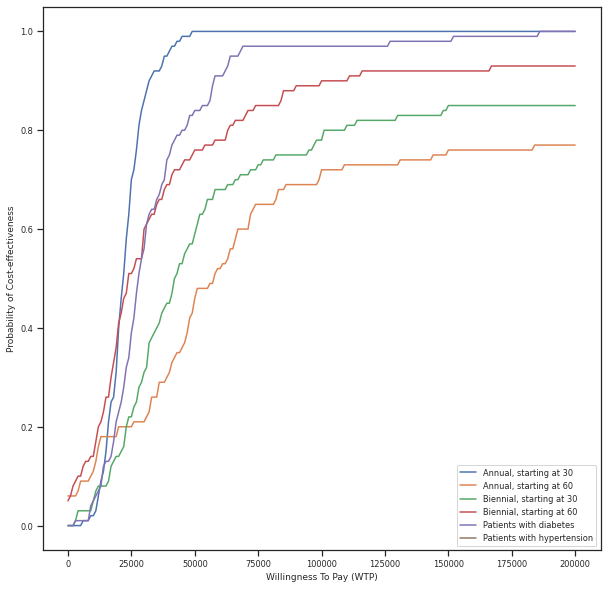

In [14]:
PSAs = pd.read_csv('appendix final figure data.csv')
#PSAs = PSAs[PSAs['lambda'].isin(lklis_4)]


PSAs.drop('Status quo', axis=1, inplace=True)


dfm = PSAs.melt('WTP', var_name='cols', value_name='vals')
dfm_wide = dfm.pivot("WTP", "cols", "vals")

sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=0.75)
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.subplots_adjust(wspace = 0.3)

sns.lineplot(data = dfm_wide, dashes=False)  
#sns.lmplot('lambda', 'vals', data=dfm, hue='cols', ci=None, order=2, truncate=True)
        
axs.set_xlabel('Willingness To Pay (WTP)')
axs.set_ylabel('Probability of Cost-effectiveness')

plt.savefig('fing_new_appendix.jpg', orientation="landscape",
           dpi=300)

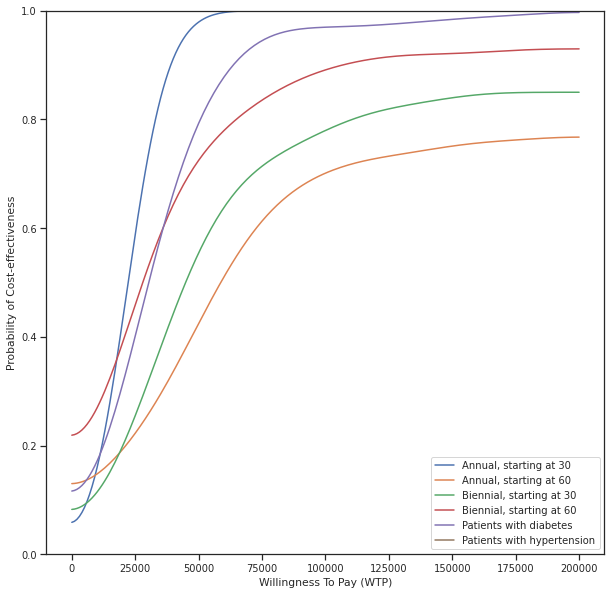

In [23]:
from scipy.ndimage import gaussian_filter1d
Final_array_smooth = gaussian_filter1d(PSAs, sigma=2)

PSA = pd.read_csv('appendix final figure data.csv')
PSA.drop('Status quo', axis=1, inplace=True)
PSA_smooth = PSA.copy()

sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig, axs = plt.subplots(nrows=1, ncols=1)
fig.subplots_adjust(wspace=0.3)

# ... (Previous code)

# Smooth the data and create a line plot
# PSA_smooth['Status quo'] = gaussian_filter1d(PSA['Status quo'], sigma=10)
PSA_smooth['Annual, starting at 30'] = gaussian_filter1d(PSA['Annual, starting at 30'], sigma=10)
PSA_smooth['Biennial, starting at 30'] = gaussian_filter1d(PSA['Biennial, starting at 30'], sigma=15)
PSA_smooth['Annual, starting at 60'] = gaussian_filter1d(PSA['Annual, starting at 60'], sigma=15)
PSA_smooth['Biennial, starting at 60'] = gaussian_filter1d(PSA['Biennial, starting at 60'], sigma=15)
PSA_smooth['Patients with diabetes'] = gaussian_filter1d(PSA['Patients with diabetes'], sigma=15)
PSA_smooth['Patients with hypertension'] = gaussian_filter1d(PSA['Patients with hypertension'], sigma=15)
# Smooth other columns similarly

# Melt and pivot the data for visualization
dfm = PSA_smooth.melt('WTP', var_name='cols', value_name='vals')
dfm_wide = dfm.pivot(index="WTP", columns="cols", values="vals")  # Use keyword arguments

# Create a legend by adding line plots with labels
sns.lineplot(data=dfm_wide, dashes=False, ax=axs)
# Add more line plots with labels for other columns
sns.set(font_scale=1.2)
# Set figure size, font scale, and style
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=0.9)
sns.set_style('whitegrid')
axs.set_ylim([0, 1])
axs.set_xlabel('Willingness To Pay (WTP)')
axs.set_ylabel('Probability of Cost-effectiveness')

# Create the legend
axs.legend()

# Adjust legend font size
for text in axs.get_legend().get_texts():
    text.set_fontsize('10')

# Save the plot
plt.savefig('fing_new_appendix_appendix.jpg', orientation="landscape", dpi=300)


In [ ]:
PSAs = pd.read_csv('R-results 3 - Reys - calculated.csv')
#PSAs = PSAs[PSAs['lambda'].isin(lklis_4)]
dfm = PSAs.melt('WTP', var_name='cols', value_name='vals')
dfm_wide = dfm.pivot("WTP", "cols", "vals")

sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=0.75)
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.subplots_adjust(wspace = 0.3)

sns.lineplot(data = dfm_wide, dashes=False)  
#sns.lmplot('lambda', 'vals', data=dfm, hue='cols', ci=None, order=2, truncate=True)
#plt.savefig('plottt_vaxes.jpg', orientation="landscape",dpi=300)

In [ ]:
lklis = []
k = 0
for i in np.arange(150) * 500:
    if np.mod(k,2) == 0:
        lklis.append(i)
    k = k + 1   
    
lklis_2 = []
k = 0
for i in lklis:
    if np.mod(k,2) == 0:
        lklis_2.append(i)
    k = k + 1  

lklis_4 = []
k = 0
for i in lklis_2:
    if np.mod(k,2) == 0:
        lklis_4.append(i)
    k = k + 1  
    
lklis_8 = []
k = 0
for i in lklis_4:
    if np.mod(k,2) == 0:
        lklis_8.append(i)
    k = k + 1  

PSAs = pd.read_csv('PSA_1_8_25000_w_100.csv')
PSAs.drop('Every 5 years, starting at 60', axis=1, inplace=True)
PSAs.drop('Every 5 years, starting at 30', axis=1, inplace=True)
#PSAs = PSAs[PSAs['lambda'].isin(lklis_4)]
dfm = PSAs.melt('lambda', var_name='cols', value_name='vals')
dfm_wide = dfm.pivot("lambda", "cols", "vals")

sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=0.75)
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.subplots_adjust(wspace = 0.3)

sns.lineplot(data = dfm_wide, dashes=False)  
#sns.lmplot('lambda', 'vals', data=dfm, hue='cols', ci=None, order=2, truncate=True)
        
#plt.savefig('plottt_vaxes.jpg', orientation="landscape",
#           dpi=300)

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d
Final_array_smooth = gaussian_filter1d(PSAs, sigma=2)

PSA = pd.read_csv('PSA_1_8_25000_w_100.csv')
PSA.drop('Every 5 years, starting at 60', axis=1, inplace=True)
PSA.drop('Every 5 years, starting at 30', axis=1, inplace=True)


PSA = PSA.rename(columns={'Biannual, starting at 30': 'Biennial, starting at 30', 'Biannual, starting at 60': 'Biennial, starting at 60'})

PSA_smooth = PSA.copy()
PSA_smooth['Annual, starting at 30'] = gaussian_filter1d(PSA['Annual, starting at 30'], sigma=10)
PSA_smooth['Biennial, starting at 30'] = gaussian_filter1d(PSA['Biennial, starting at 30'], sigma=15)
PSA_smooth['Annual, starting at 60'] = gaussian_filter1d(PSA['Annual, starting at 60'], sigma=15)
PSA_smooth['Biennial, starting at 60'] = gaussian_filter1d(PSA['Biennial, starting at 60'], sigma=15)
PSA_smooth['Patients with diabetes'] = gaussian_filter1d(PSA['Patients with diabetes'], sigma=15)
PSA_smooth['Patients with hypertension'] = gaussian_filter1d(PSA['Patients with hypertension'], sigma=15)
dfm = PSA_smooth.melt('lambda', var_name='cols', value_name='vals')
dfm_wide = dfm.pivot("lambda", "cols", "vals")

sns.set(rc={'figure.figsize':(10,10)})
sns.set(font_scale=0.9)
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.subplots_adjust(wspace = 0.3)

sns.lineplot(data = dfm_wide, dashes=False)   
axs.set_ylim([0,1])
axs.set_xlabel('Willingness To Pay (WTP)')
axs.set_ylabel('Probability Intervention Is Cost-effective')

plt.setp(axs.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(axs.get_legend().get_title(), fontsize='10') # for legend title

plt.savefig('PSA_ALL_smoohed.jpg', orientation="landscape",
           dpi=300)

In [ ]:
PSAs

In [ ]:
PSAs = pd.read_csv('PSA_1_8_25000_w_100.csv')
PSA_smooth = PSAs.copy()
PSA_smooth['Annual, starting at 30'] = gaussian_filter1d(PSAs['Annual, starting at 30'], sigma=10)
PSA_smooth['Patients with diabetes'] = gaussian_filter1d(PSAs['Patients with diabetes'], sigma=15)
dfm = PSA_smooth.melt('lambda', var_name='cols', value_name='vals')
dfm_wide = dfm.pivot("lambda", "cols", "vals")

sns.set(rc={'figure.figsize':(8,8)})
sns.set(font_scale=0.75)
sns.set_style("whitegrid")
sns.set_style("ticks", {"xtick.major.size": 7, "ytick.major.size": 7})

fig, axs = plt.subplots(nrows = 1, ncols = 1)
fig.subplots_adjust(wspace = 0.3)

sns.lineplot(data = dfm_wide, dashes=False, color=['r', 'g'])   
axs.set_ylim([0,1])
axs.set_xlabel('Willingness To Pay (WTP)')
axs.set_ylabel('Probability of Cost-effectiveness')
plt.savefig('plottt.jpg', orientation="landscape",
           dpi=300)

In [ ]:
PSAs.columns

In [ ]:
from scipy.ndimage.filters import gaussian_filter1d
Final_array_smooth = gaussian_filter1d(PSAs, sigma=2)

In [ ]:
PSAs.shape

In [ ]:
dfm_wide

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- Calculate CEAC ----------
def calculate_ceac(Q, C, strategy_names):
    wtps = np.arange(0, 200001, 1000)
    ceac = []

    for w in wtps:
        WTP = w
        NB = Q * WTP - C
        ceac_row = np.zeros(NB.shape[1])

        if NB.shape[1] > 2:
            for i in range(NB.shape[1]):
                ceac_row[i] = np.mean(np.sum(NB[:, i][:, np.newaxis] >= NB[:, np.arange(NB.shape[1]) != i], axis=1) == NB.shape[1] - 1)
        else:
            ceac_row[0] = np.mean(NB[:, 0] >= NB[:, 1])
            ceac_row[1] = np.mean(NB[:, 0] < NB[:, 1])

        ceac.append(ceac_row)

    sol = pd.DataFrame(np.column_stack((wtps, pd.DataFrame(ceac))), columns=["WTP"] + strategy_names)
    return sol


# Load the data
psa = pd.read_excel("/storage/home/r/rzz5164/work/PSA - Scenarios 1 to 8/PSA total - WTP/CEAC Data - 100 sets of random variables - 25000 patietns - 2023.xlsx")

# Remove the first column from psa DataFrame
psa = psa.iloc[:, 1:]

Qval = psa.iloc[:, 1:7]   # Select columns 0 to 5 for DALYS (since the first column was removed)
Cval = psa.iloc[:, 8:14]   # Select columns 6 to 12 for COSTS (since the first column was removed)
names_policy = ["Policy0", "Policy1", "Policy2", "Policy4", "Policy5", "Policy7", "Policy8"]

# Calculate Qval_incr and Cval_incr
Qval_incr = np.zeros((Qval.shape[0], 1))
Cval_incr = np.zeros((Cval.shape[0], 1))
for i in range(6):
    Cval_incr = np.column_stack((Cval_incr, Cval.iloc[:, i].values - Cval.iloc[:, 0].values))
    Qval_incr = np.column_stack((Qval_incr, Qval.iloc[:, i].values - Qval.iloc[:, 0].values))
    
ceac = calculate_ceac(Qval_incr, Cval_incr, names_policy)

result.to_csv("ceac_results.csv", index=False)

print(result)

In [ ]:
Qval_incr = np.zeros((Qval.shape[0], 1))
Cval_incr = np.zeros((Cval.shape[0], 1))
for i in range(6):
    Cval_incr = np.column_stack((Cval_incr, Cval.iloc[:, i].values - Cval.iloc[:, 0].values))
    Qval_incr = np.column_stack((Qval_incr, Qval.iloc[:, i].values - Qval.iloc[:, 0].values))
    

In [ ]:
Q = Qval_incr
C = Cval_incr

wtps = np.arange(0, 200001, 1000)
ceac = []

for w in wtps:
    WTP = w
    NB = Q * WTP - C
    ceac_row = np.zeros(NB.shape[1])

    if NB.shape[1] > 2:
        for i in range(NB.shape[1]):
            ceac_row[i] = np.mean(np.sum(NB[:, i] >= NB[:, np.arange(NB.shape[1]) != i], axis=1) == NB.shape[1] - 1)
    else:
        ceac_row[0] = np.mean(NB[:, 0] >= NB[:, 1])
        ceac_row[1] = np.mean(NB[:, 0] < NB[:, 1])

    ceac.append(ceac_row)

sol = pd.DataFrame(np.column_stack((wtps, pd.DataFrame(ceac))), columns=["WTP"] + strategy_names)

In [ ]:
NB[:, 2] >= NB[:, np.arange(NB.shape[1]) != i]

In [ ]:
import pandas as pd
import numpy as np

def calculate_ceac(Q, C, strategy_names):
    wtps = np.arange(0, 200001, 1000)
    ceac = []

    for w in wtps:
        WTP = w
        NB = Q * WTP - C
        ceac_row = np.zeros(NB.shape[1])

        if NB.shape[1] > 2:
            for i in range(NB.shape[1]):
                ceac_row[i] = np.mean(np.sum(NB[:, i][:, np.newaxis] >= NB[:, np.arange(NB.shape[1]) != i], axis=1) == NB.shape[1] - 1)
        else:
            ceac_row[0] = np.mean(NB[:, 0] >= NB[:, 1])
            ceac_row[1] = np.mean(NB[:, 0] < NB[:, 1])

        ceac.append(ceac_row)

    sol = pd.DataFrame(np.column_stack((wtps, pd.DataFrame(ceac))), columns=["WTP"] + strategy_names)
    return sol

# Example usage:
# Assuming Q is a 100x6 numpy array, C is also a 100x6 numpy array, and strategy_names is a list of strings.
# For demonstration purposes, I will use dummy data.
Q = np.random.rand(100, 6)
C = np.random.rand(100, 6)
strategy_names = ["Strategy0", "Strategy1", "Strategy2", "Strategy3", "Strategy4", "Strategy5"]
result = calculate_ceac(Q, C, strategy_names)

print(result)
